In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import mapclassify

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Arial'

In [3]:
pd.__version__

'2.1.1'

In [4]:
gpd.__version__

'0.14.4'

## Shapefile für den Zensus-Stichtag 15. Mai 2022
Freier Download, Verwendung mit Quellenangabe BKG  
https://www.zensus2022.de/DE/Presse/Grafik/shapefile.html

<Axes: >

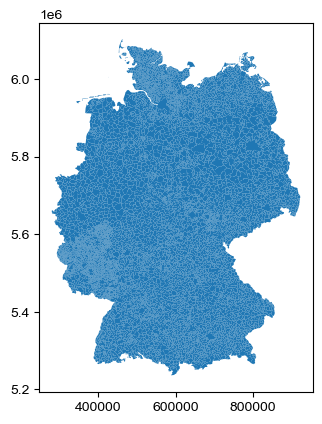

In [5]:
# erzeugt mit mapshaper.org : filter "GF==4"; filter-fields ARS; simplification 4%
gemeindegrenzen = gpd.read_file("VG250_GEM_simplified.zip").set_index("ARS")
gemeindegrenzen.plot()

<Axes: >

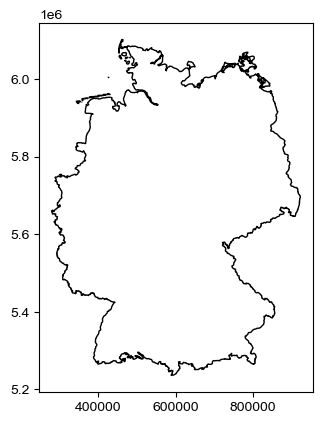

In [6]:
# erzeugt mit mapshaper.org : dissolve
bundesgrenze = gpd.read_file("VG250_DE_simplified.zip")
bundesgrenze.plot(facecolor="None")

<Axes: >

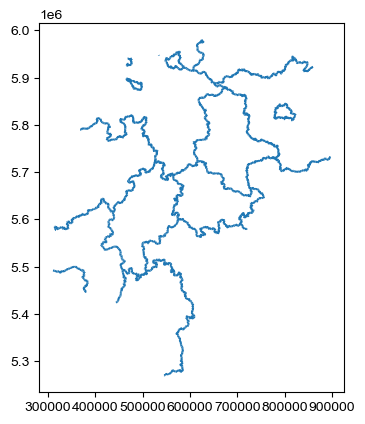

In [7]:
# erzeugt mit mapshaper.org : innerlines where='A.ARS.substring(0,2) != B.ARS.substring(0,2)'
laendergrenzen = gpd.read_file("VG250_LAN_mesh_simplified.zip")
laendergrenzen.plot()

## Ergebnisse des Zensus 2022 ab 25. Juni 2024
Vorabveröffentlichung der leeren Tabellenrahmen seit 19. Juni 2024 unter  
https://www.zensus2022.de/DE/Ergebnisse/_inhalt.html#toc-2  
Die dort angebotene ZIP-Datei (9.1 MB) enthält mehrere Excel-Dateien, die jeweils ein oder mehrere thematisch gegliederte CSV-Sheets enthalten und die direkt verarbeitet werden können. Die Excel Dateien müssen nicht bearbeitet werden. Getesteter Beispielcode, anschließend einige Hinweise:

In [8]:
# Tabelle mit Zufallszahlen im Wertebereich 0-50 und einer Nachkomamstelle befüllt
# Gemeinde Wiesbaden mit 'nichts vorhanden' befüllt (Gedankenstrich)

regioTabelle_GWZ = pd.read_excel("Regionaltabelle_Gebäude_Wohnungen_Z22_Tabellenrahmen_inkl_CSV.xlsx", sheet_name="CSV-Wohnungen",
                                dtype={"_RS":str}, decimal=",", 
                                na_values=["–","-",".","/","X"])\
                                .set_index("_RS")

## Hinweise zum Einlesen der Daten
* Die CSV-Sheets können direkt aus der Excel-Datei eingelesen werden, in obigem Beispiel `CSV-Wohnungen`
* Einige Programmversionen von `openpyxl` (Excel-Engine von Pandas) haben in der Vergangenheit Probleme gemacht,  
ggf. Fehlermeldung in Suchmaschine eingeben und Version up- oder downgraden
* Der Regionalschlüssel `_RS` enthält führende Nullen und muss als Zeichenkette (String) eingelesen werden
* Die Datenspalten können neben Ziffern auch Zeichen enthalten, z.B. den längeren Gedankenstrich `–` für _Genau Null oder auf Null geändert_ (dies entspricht dem kürzeren Minuszeichen `-` in Genesis-Systemen), weitere Zeichen entsprechend dem Tabellenblatt Methodenbeschreibung
* Für Statistikzwecke z.B. als `NaN` codieren, hier mit `na_values=` um die Erkennung als Zahl zu erhalten
* Es können deutsche Dezimalkommata vorkommen, daher die Angabe `decimal=","` um die Erkennung als Zahl zu erhalten

In [9]:
regioTabelle_GWZ.columns

Index(['Berichtszeitpunkt', 'Name', 'Regionalebene', 'GEBAEUDEART_SYS_1',
       'GEBAEUDEART_SYS_11', 'GEBAEUDEART_SYS_111', 'GEBAEUDEART_SYS_112',
       'GEBAEUDEART_SYS_12', 'ZAHLWOHNGN_HHG__1', 'ZAHLWOHNGN_HHG__2',
       'ZAHLWOHNGN_HHG__3', 'ZAHLWOHNGN_HHG__4', 'ZAHLWOHNGN_HHG__5',
       'BAUJAHR_10JA__01', 'BAUJAHR_10JA__02', 'BAUJAHR_10JA__03',
       'BAUJAHR_10JA__04', 'BAUJAHR_10JA__05', 'BAUJAHR_10JA__06',
       'BAUJAHR_10JA__07', 'BAUJAHR_10JA__08', 'BAUJAHR_10JA__09',
       'BAUJAHR_10JA__10', 'EIGENTUM__1', 'EIGENTUM__2', 'EIGENTUM__3',
       'EIGENTUM__4', 'EIGENTUM__5', 'EIGENTUM__6', 'EIGENTUM__7',
       'EIGENTUM__8', 'HEIZTYP__1', 'HEIZTYP__2', 'HEIZTYP__3', 'HEIZTYP__4',
       'HEIZTYP__5', 'HEIZTYP__6', 'ENERGIETRAEGER__1', 'ENERGIETRAEGER__2',
       'ENERGIETRAEGER__3', 'ENERGIETRAEGER__4', 'ENERGIETRAEGER__5',
       'ENERGIETRAEGER__6', 'ENERGIETRAEGER__7', 'NERGIETRAEGER__8',
       'ENERGIETRAEGER__9', 'NUTZUNG__01', 'NUTZUNG__02', 'NUTZUNG__03',
   

In [10]:
# ausgewählte Datenspalten, die direkt kartiert werden können
regioTabelle_GWZ[["Name","QMMIETE","LEQ","ETQ","FLAECHE","meinZufall"]]

,Name,QMMIETE,LEQ,ETQ,FLAECHE,meinZufall
_RS,,,,,,
00,Deutschland,NaN,NaN,NaN,NaN,19.9
01,Schleswig-Holstein,NaN,NaN,NaN,NaN,33.4
01001,"Flensburg, Stadt",NaN,NaN,NaN,NaN,38.0
010010000000,"Flensburg, Stadt",NaN,NaN,NaN,NaN,25.4
01002,"Kiel, Landeshauptstadt",NaN,NaN,NaN,NaN,30.6
...,...,...,...,...,...,...
160775051023,Langenleuba-Niederhain,NaN,NaN,NaN,NaN,39.2
160775051036,Nobitz,NaN,NaN,NaN,NaN,6.6
160775052,"Schmölln, Stadt",NaN,NaN,NaN,NaN,36.1


## Daten mit GeoDataFrame aus Shapefile verbinden
Es wird entlang der jeweiligen Indices (Regionalschlüssel) zusammengeführt.  
Die Regionaltabellen als auch das bereitgestellt Shapefile enthalten ebenfalls die Ebenen Gemeindeverbände und Kreise, das Vorgehen wie hier beschreiben würde für diese immer identisch ablaufen.

In [11]:
regioTabelle_GWZ_gem = gemeindegrenzen.join(regioTabelle_GWZ)

In [12]:
regioTabelle_GWZ_gem.head(3)[["Name","geometry","QMMIETE","LEQ","ETQ","FLAECHE","meinZufall"]]

,Name,geometry,QMMIETE,LEQ,ETQ,FLAECHE,meinZufall
ARS,,,,,,,
010010000000,"Flensburg, Stadt","POLYGON ((527173.204 6075202.115, 527914.416 6...",NaN,NaN,NaN,NaN,25.4
010020000000,"Kiel, Landeshauptstadt","POLYGON ((576003.314 6031749.596, 577425.188 6...",NaN,NaN,NaN,NaN,38.0
010030000000,"Lübeck, Hansestadt","POLYGON ((624906.198 5980395.728, 625243.141 5...",NaN,NaN,NaN,NaN,18.5


## Karte zeichnen/ausgeben
Zur massenhaften schnellen Exploration empfiehlt sich die Klasseneinteilung mit `NaturalBreaks` (Jenks).  
Wählt man später mit `userdefined` Klassengrenzen, kann man auch das Zahlenformat `fmt` der Legende anpassen, z.B. `{:.0f}` für ganze Zahlen.  
Als Farbschemata können u.a. [Colorbrewer](https://colorbrewer2.org/#type=sequential&scheme=PuBuGn&n=6)-Kürzel wie `PuGn` oder `viridis` verwendet werden.

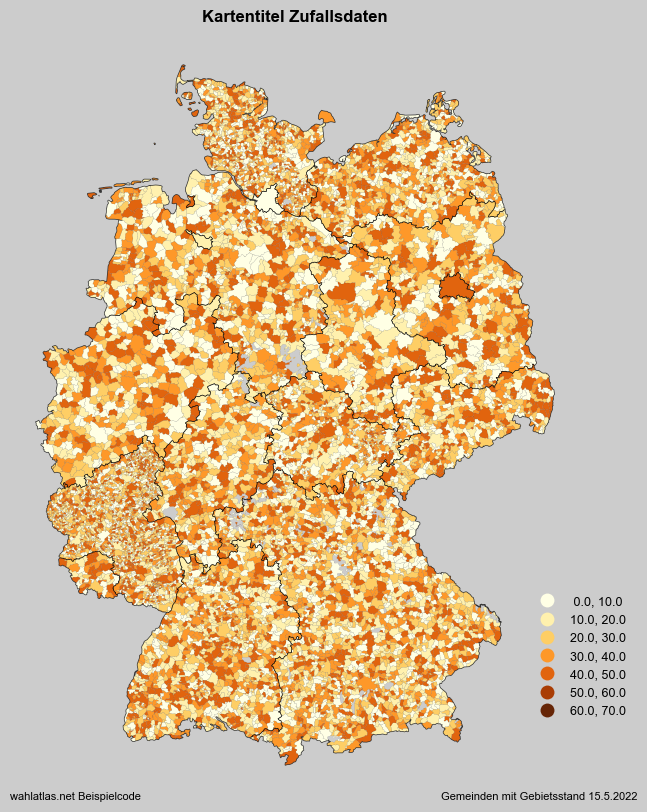

In [13]:
fig, ax = plt.subplots(1, figsize=(12,10))
fig.set_facecolor("#ccc")
ax.axis("off")

ax.set_title("Kartentitel Zufallsdaten", fontdict={"fontsize":12, "fontweight": "bold"})
ax.annotate("wahlatlas.net Beispielcode", xy=(0,0), xycoords="axes fraction", ha="left", fontsize=8)
ax.annotate("Gemeinden mit Gebietsstand 15.5.2022", xy=(1.1,0), xycoords="axes fraction", ha="right", fontsize=8)
bundesgrenze.plot(facecolor = "None", linewidth = 1, edgecolor = "#333", ax=ax )

regioTabelle_GWZ_gem.plot(column = "meinZufall", cmap = "YlOrBr",
                          #scheme = "NaturalBreaks", k=7,
                          scheme = "userdefined", classification_kwds = {"bins": [10,20,30,40,50,60,70]},
                          legend = True, legend_kwds = {"fmt": "{:.1f}", "frameon": False,
                                                       "markerscale": 1, "fontsize": 9,
                                                       "bbox_to_anchor": (1.1, 0.28)},
                          linewidth = .05, edgecolor = "#333", ax=ax )

laendergrenzen.plot(facecolor = "None", linewidth = .5, edgecolor = "#000", ax=ax )
plt.savefig("meine_Karte_Zensus2022.png", bbox_inches="tight", pad_inches=.15, dpi=96) #  .svg | .pdf | .png
plt.show()